In [27]:
# Cell 1: First cell should ALWAYS import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# Magic command to show plots inline in Jupyter
%matplotlib inline

print("All libraries imported successfully!")

All libraries imported successfully!


In [28]:
# Data Loading and Exploration

# Load the dataset from a CSV file
df = pd.read_csv('owid-covid-data.csv') 

# Explore the structure
print("Columns in dataset:")
print(df.columns)

# Preview the top rows
df.head()

# Check for missing values
df.isnull().sum()


Columns in dataset:
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_

iso_code                                        0
continent                                   16665
location                                        0
date                                            0
total_cases                                 37997
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality                           337901
excess_mortality_cumulative_per_million    337901
Length: 67, dtype: int64

In [29]:
# Data Cleaning and Preparation

# Filter for countries of interest
countries = ['Kenya', 'United States', 'India']
df_countries = df[df['location'].isin(countries)].copy()

# Convert date column to datetime format safely
df_countries.loc[:, 'date'] = pd.to_datetime(df_countries['date'])

# Drop rows with missing critical values
df_countries = df_countries.dropna(subset=['total_cases', 'total_deaths', 'total_vaccinations'])

# Forward-fill only numeric columns to avoid FutureWarnings
numeric_cols = df_countries.select_dtypes(include=['number']).columns
df_countries[numeric_cols] = df_countries[numeric_cols].ffill()

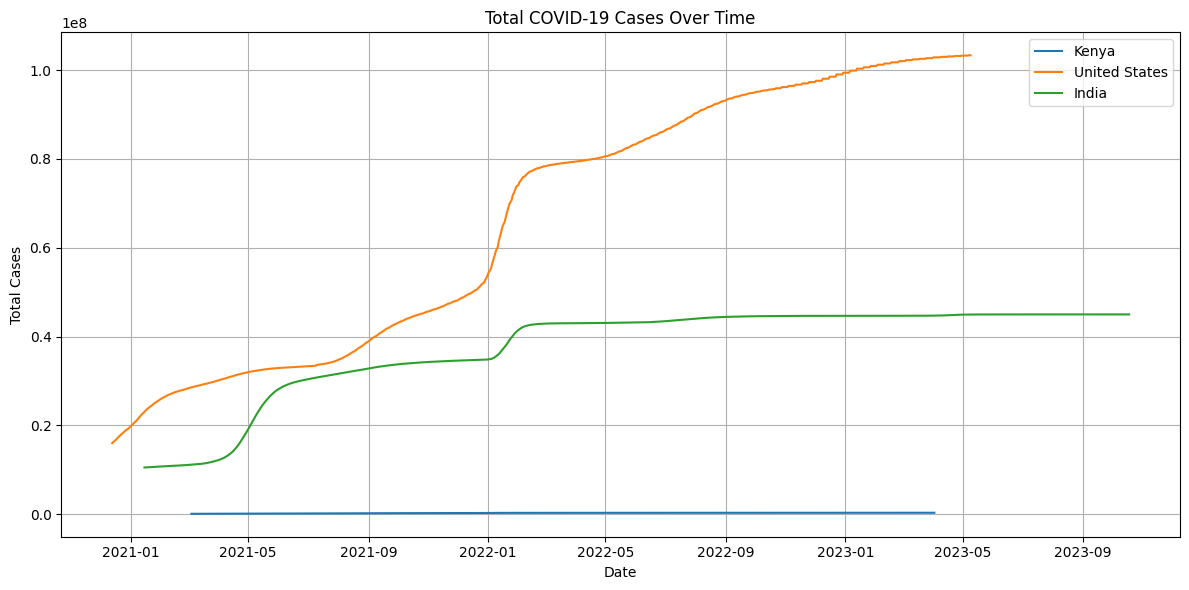

Death rate calculated successfully:
       iso_code      continent       location                 date  \
140151      IND           Asia          India  2021-01-15 00:00:00   
140152      IND           Asia          India  2021-01-16 00:00:00   
140153      IND           Asia          India  2021-01-17 00:00:00   
140154      IND           Asia          India  2021-01-18 00:00:00   
140155      IND           Asia          India  2021-01-19 00:00:00   
...         ...            ...            ...                  ...   
330699      USA  North America  United States  2023-05-05 00:00:00   
330700      USA  North America  United States  2023-05-06 00:00:00   
330701      USA  North America  United States  2023-05-07 00:00:00   
330702      USA  North America  United States  2023-05-08 00:00:00   
330703      USA  North America  United States  2023-05-09 00:00:00   

        total_cases  new_cases  new_cases_smoothed  total_deaths  new_deaths  \
140151   10527683.0    15590.0           16

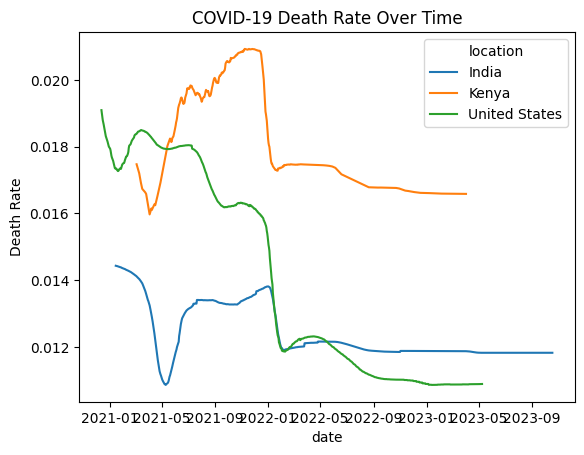

In [30]:
# Exploratory Data Analysis (EDA)

# Plot total cases over time
plt.figure(figsize=(12,6))
for country in countries:
    df_country = df_countries[df_countries['location'] == country]
    plt.plot(df_country['date'], df_country['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate death rate and plot
df_countries['death_rate'] = df_countries['total_deaths'] / df_countries['total_cases']
print("Death rate calculated successfully:")
print(df_countries)

sns.lineplot(data=df_countries, x='date', y='death_rate', hue='location')
plt.title('COVID-19 Death Rate Over Time')
plt.ylabel('Death Rate')
plt.show()

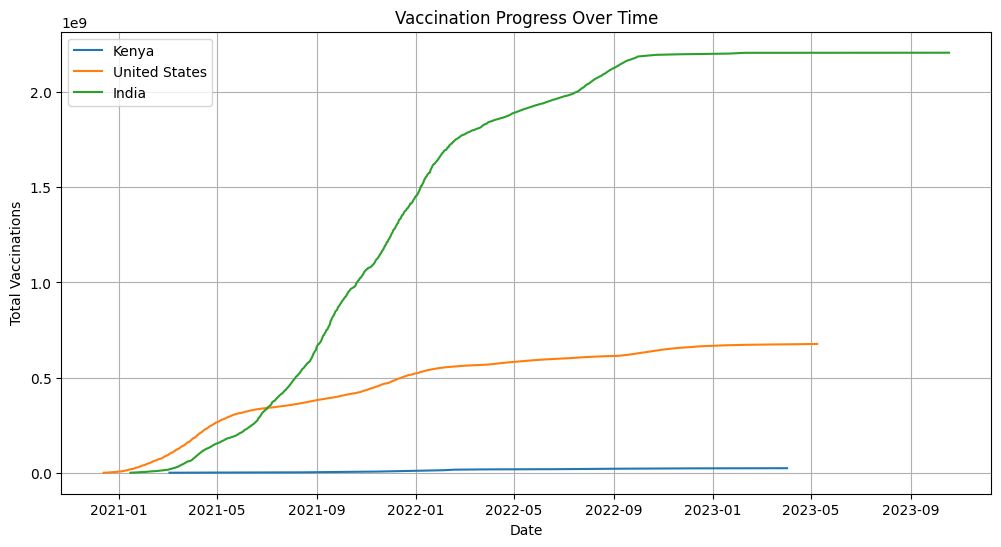

Percentage of population vaccinated calculated successfully:
       location                 date  percent_vaccinated
140151    India  2021-01-15 00:00:00            0.000000
140152    India  2021-01-16 00:00:00            0.013490
140153    India  2021-01-17 00:00:00            0.015827
140154    India  2021-01-18 00:00:00            0.032039
140155    India  2021-01-19 00:00:00            0.047618


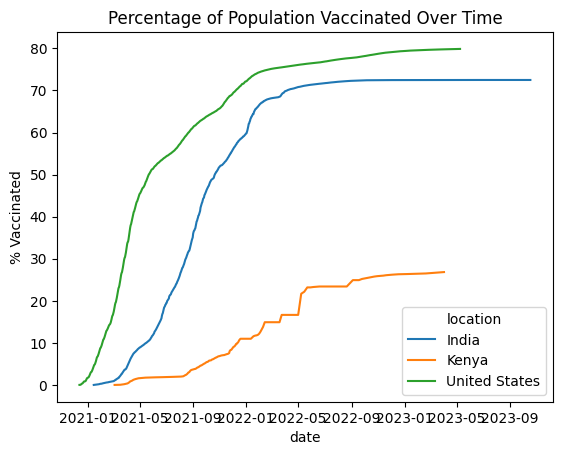

In [31]:
# Visualizing Vaccination Progress

# Plot total vaccinations over time
plt.figure(figsize=(12,6))
for country in countries:
    df_country = df_countries[df_countries['location'] == country]
    plt.plot(df_country['date'], df_country['total_vaccinations'], label=country)

plt.title('Vaccination Progress Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.show()

# Calculate % vaccinated
df_countries['percent_vaccinated'] = (df_countries['people_vaccinated'] / df_countries['population']) * 100
print("Percentage of population vaccinated calculated successfully:")
print(df_countries[['location', 'date', 'percent_vaccinated']].head())

# Plot percent vaccinated
sns.lineplot(data=df_countries, x='date', y='percent_vaccinated', hue='location')
plt.title('Percentage of Population Vaccinated Over Time')
plt.ylabel('% Vaccinated')
plt.show()

In [32]:
# Optional: Build a Choropleth Map

# Get latest date's data
latest = df[df['date'] == df['date'].max()]

# Filter out rows without iso_code
choropleth_df = latest[['iso_code', 'location', 'total_cases', 'total_vaccinations']].dropna()

# Create a map
fig = px.choropleth(choropleth_df, locations='iso_code',
                    color='total_cases',
                    hover_name='location',
                    title='Total COVID-19 Cases by Country (Latest)',
                    color_continuous_scale='Reds')
fig.show()

# Insights & Reporting

# Key Insights:
1. India recorded the highest total cases among the selected countries, but USA had the highest death toll.

2. Kenya had a significantly slower vaccine rollout initially, but showed gradual progress.

3. Death rates fluctuated early in the pandemic but stabilized over time.

4. Vaccination rollout correlated with reduced growth in new cases in late 2021.

